In [1]:
import numpy as np
from hazm import *
import pandas as pd
from collections import Counter

In [2]:
df1 = pd.read_csv('ham_culture.csv', nrows=50)
df2 = pd.read_csv('ham_economy.csv', nrows=50)
df3 = pd.read_csv('ham_politics.csv', nrows=50)
df4 = pd.read_csv('ham_sport.csv', nrows=50)
df5 = pd.read_csv('irna_culture.csv', nrows=50)
df6 = pd.read_csv('irna_economy.csv', nrows=50)
df7 = pd.read_csv('irna_politics.csv', nrows=50)
df8 = pd.read_csv('irna_sport.csv', nrows=50)
df9 = pd.read_csv('isna_culture.csv', nrows=50)
df10 = pd.read_csv('isna_economy.csv', nrows=50)
df11 = pd.read_csv('isna_politics.csv', nrows=50)
df12 = pd.read_csv('isna_sport.csv', nrows=50)
df13 = pd.read_csv('mehr_culture.csv', nrows=50)
df14 = pd.read_csv('mehr_economy.csv', nrows=50)
df15 = pd.read_csv('mehr_politics.csv', nrows=50)
df16 = pd.read_csv('mehr_sport.csv', nrows=50)
docs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16]

In [3]:
unprocessed = str()
for i in range(16):
    for j in range (len(docs[i])):
        unprocessed+=docs[i]['Text'][j]
print(len(unprocessed))
print(type(unprocessed[0]))
print(len(unprocessed[3]))

1595470
<class 'str'>
1


In [4]:
characters_to_remove = [':', ';', '""', '!', '؟', '|', '>', '<', '.', '،', "''", ')', '(', '»', '«', '/', '\\', '_', '-', '؛', 
                        '\u200c', '\\u200c', '/u200c', '//u200c', 'u200c\\', 'انتهای پیام', 'کد خبر',
                        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 
                        'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 
                        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 
                        'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',]
for j in characters_to_remove:
    unprocessed = unprocessed.replace(j,'')
print(len(unprocessed))

1545207


In [9]:
def preprocess(data):
    #normalizing data
    normalizer = Normalizer()
    norm_data = normalizer.remove_specials_chars(data)
    norm_data = normalizer.normalize(norm_data)    
    # Tokenize data
    tokens = word_tokenize(norm_data)

    # Remove stopwords 
    stop_words = set(stopwords_list())
    tokens = [word for word in tokens if word not in stop_words ]

    # Lemmatize words
    lemmatizer = Lemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]


    return tokens

In [10]:
tokens_a=preprocess(unprocessed)

In [12]:
len(tokens_a)

176239

In [169]:
#vocabulary
counter_a=Counter(tokens_a)
print(len(vocabulary))
#count_a

15242


In [112]:
with open('vocabulary.txt', 'w', encoding="utf-8") as data:
    data.write(str(counter_a))

In [172]:
vocab_df = pd.DataFrame(list(counter_a.items()), columns=['Tokens', 'Frequency'])
vocab_df.sort_values(by=['Frequency'], ascending=False, inplace=True, ignore_index=True)
vocab_df = vocab_df.iloc[0:50]

In [173]:
x_df = vocab_df['Tokens']

In [174]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [175]:
persian_labels = [get_display(reshape(label)) for label in x_df]
# persian_labels

<Axes: ylabel='Tokens'>

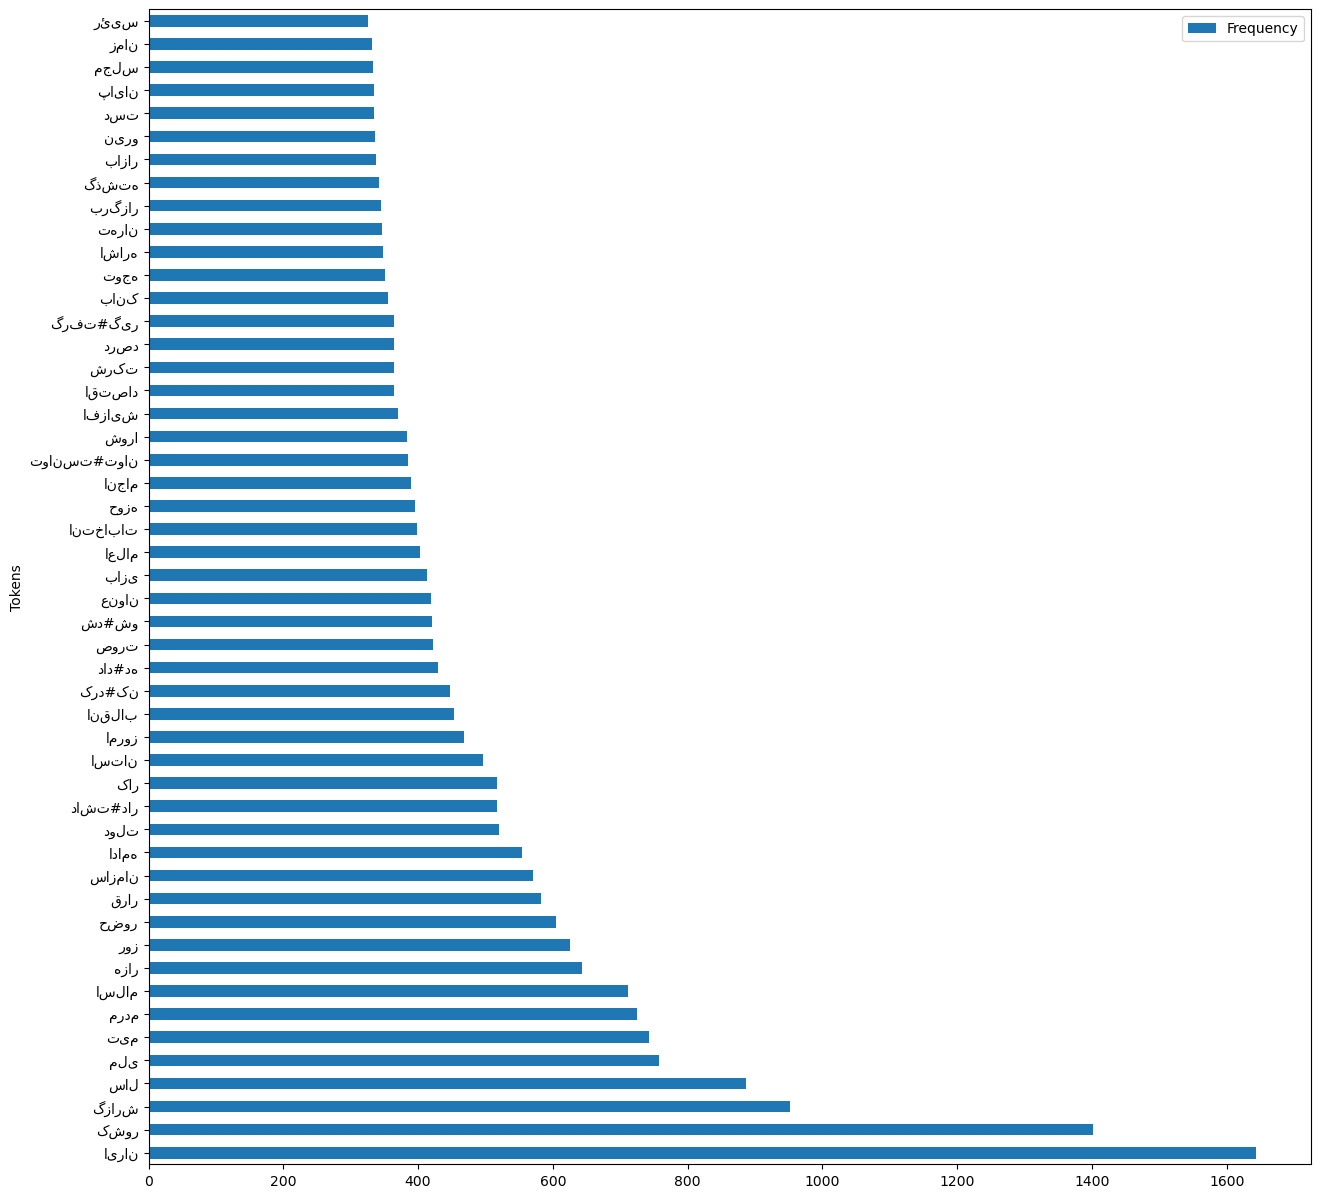

In [179]:
vocab_df.plot.barh(x='Tokens', figsize=(15, 15))